# Predicting Car Prices

## Import the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.shape

(205, 26)

In [4]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Numeric columns: `normalized-losses`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-rate`, `city-mpg`, `highway-mpg`.

Target column: `price`

## Data cleaning

In [5]:
cars.replace('?',np.nan,inplace=True)
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
cars[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = cars[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].astype('float64',copy=False)

In [7]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

`normalized-losses` has some missing values:

In [8]:
cars['normalized-losses'].isnull().sum()

41

We will drop this column since it contains about 20% of missing values.

In [9]:
cars.drop(['normalized-losses'],axis=1,inplace=True)

We will check other columns for missing values.

In [10]:
cars.isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               4
dtype: int64

In [11]:
columns_with_na = ['bore','stroke','horsepower','peak-rpm','price']
for col in columns_with_na:
    cars = cars[cars[col].notna()]
cars.isnull().sum()

symboling           0
make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-type         0
num-of-cylinders    0
engine-size         0
fuel-system         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [12]:
cars.dtypes

symboling             int64
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
length              float64
width               float64
height              float64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                float64
stroke              float64
compression-rate    float64
horsepower          float64
peak-rpm            float64
city-mpg              int64
highway-mpg           int64
price               float64
dtype: object

In [23]:
numeric_cols = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
                'compression-rate','horsepower','city-mpg', 'highway-mpg','peak-rpm']

cars_copy = cars.copy()

cars_copy[numeric_cols] = (cars_copy[numeric_cols] - 
                           cars_copy[numeric_cols].min()) / (cars_copy[numeric_cols].max() - 
                                                             cars_copy[numeric_cols].min())

Randomizing the dataframe:

In [44]:
cars_copy = cars_copy.sample(frac=1)
cars_copy.reset_index(inplace=True,drop=True)

In [45]:
cars_copy

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,peugot,diesel,turbo,four,wagon,rwd,front,0.804665,0.862687,0.692308,0.908333,0.753297,l,four,0.343396,idi,0.828571,0.690476,0.87500,0.219626,0.000000,0.333333,0.236842,13860.0
1,2,bmw,gas,std,two,sedan,rwd,front,0.425656,0.532836,0.384615,0.541667,0.351823,ohc,four,0.177358,mpfi,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0
2,0,honda,gas,std,four,wagon,fwd,front,0.288630,0.238806,0.307692,0.875000,0.207913,ohc,four,0.116981,1bbl,0.271429,0.638095,0.13750,0.130841,0.755102,0.472222,0.473684,7295.0
3,3,nissan,gas,std,two,hatchback,rwd,front,0.137026,0.441791,0.649573,0.158333,0.614042,ohcv,six,0.452830,mpfi,0.635714,0.571429,0.12500,0.523364,0.428571,0.166667,0.236842,17199.0
4,1,dodge,gas,std,four,sedan,fwd,front,0.206997,0.241791,0.299145,0.233333,0.194337,ohc,four,0.109434,2bbl,0.307143,0.552381,0.15000,0.093458,0.551020,0.500000,0.578947,7609.0
5,-1,volvo,gas,std,four,sedan,rwd,front,0.655977,0.711940,0.735043,0.641667,0.591156,ohcv,six,0.422642,mpfi,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
6,0,bmw,gas,std,four,sedan,rwd,front,0.682216,0.834328,0.905983,0.708333,0.782389,ohc,six,0.558491,mpfi,0.771429,0.628571,0.06250,0.626168,0.510204,0.055556,0.105263,36880.0
7,2,mitsubishi,gas,std,two,hatchback,fwd,front,0.206997,0.241791,0.350427,0.250000,0.166796,ohc,four,0.116981,2bbl,0.307143,0.552381,0.15000,0.093458,0.551020,0.666667,0.657895,5389.0
8,0,subaru,gas,std,four,wagon,4wd,front,0.300292,0.485075,0.435897,0.591667,0.361521,ohcf,four,0.177358,2bbl,0.771429,0.271429,0.12500,0.158879,0.265306,0.277778,0.342105,8013.0
9,1,nissan,gas,std,four,sedan,fwd,front,0.230321,0.361194,0.299145,0.558333,0.187355,ohc,four,0.135849,2bbl,0.435714,0.580952,0.15000,0.098131,0.428571,0.500000,0.552632,7499.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models.

In [49]:
def knn_train_test(train_col,target_col,df):
    train_set_size = round(len(df)*0.75)
    train_set = df[:train_set_size]
    test_set = df[train_set_size:]
    knn = KNeighborsRegressor()
    knn.fit(train_set[[train_col]],train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    return mean_squared_error(test_set['price'],predictions)**(1/2)

In [52]:
rmses = {}
for numeric_col in numeric_cols:
    rmse = knn_train_test(numeric_col,'price',cars_copy)
    rmses[numeric_col] = round(rmse,2)

In [53]:
rmses

{'wheel-base': 7184.69,
 'length': 6166.81,
 'width': 5421.82,
 'height': 9406.95,
 'curb-weight': 5558.54,
 'engine-size': 3549.0,
 'bore': 8118.67,
 'stroke': 8840.95,
 'compression-rate': 7645.1,
 'horsepower': 5604.01,
 'city-mpg': 4788.71,
 'highway-mpg': 5009.77,
 'peak-rpm': 9335.68}

With the default k value, we got the best results with `engine-size`

We will modify the function to take into account a value for k

In [54]:
def knn_train_test_k(train_col,target_col,df,k):
    train_set_size = round(len(df)*0.75)
    train_set = df[:train_set_size]
    test_set = df[train_set_size:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[train_col]],train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    return mean_squared_error(test_set['price'],predictions)**(1/2)

In [57]:
ks = [1,3,5,7,9]

rmses_k = {}
for numeric_col in numeric_cols:
    for k in ks:
        rmse = knn_train_test_k(numeric_col,'price',cars_copy,k)
        rmses_k[numeric_col + '_' + str(k)] = round(rmse,2)
        
rmses_k

{'wheel-base_1': 5133.46,
 'wheel-base_3': 6352.46,
 'wheel-base_5': 7184.69,
 'wheel-base_7': 7068.06,
 'wheel-base_9': 7272.91,
 'length_1': 6670.76,
 'length_3': 5712.0,
 'length_5': 6166.81,
 'length_7': 6603.13,
 'length_9': 6720.9,
 'width_1': 4927.91,
 'width_3': 5346.6,
 'width_5': 5421.82,
 'width_7': 5613.01,
 'width_9': 5952.25,
 'height_1': 11551.84,
 'height_3': 9123.02,
 'height_5': 9406.95,
 'height_7': 9444.78,
 'height_9': 9590.78,
 'curb-weight_1': 6262.8,
 'curb-weight_3': 5970.48,
 'curb-weight_5': 5558.54,
 'curb-weight_7': 5265.92,
 'curb-weight_9': 5234.68,
 'engine-size_1': 3684.58,
 'engine-size_3': 3028.53,
 'engine-size_5': 3549.0,
 'engine-size_7': 4380.5,
 'engine-size_9': 4898.81,
 'bore_1': 7843.51,
 'bore_3': 8118.59,
 'bore_5': 8118.67,
 'bore_7': 8136.02,
 'bore_9': 8233.4,
 'stroke_1': 11936.14,
 'stroke_3': 8815.66,
 'stroke_5': 8840.95,
 'stroke_7': 8634.03,
 'stroke_9': 8786.08,
 'compression-rate_1': 7423.06,
 'compression-rate_3': 7753.48,
 'comp

In [65]:
results = pd.Series(rmses_k)

In [67]:
results.sort_values()

engine-size_3          3028.53
engine-size_5          3549.00
engine-size_1          3684.58
engine-size_7          4380.50
city-mpg_3             4541.82
city-mpg_5             4788.71
engine-size_9          4898.81
width_1                4927.91
city-mpg_1             4984.22
highway-mpg_5          5009.77
horsepower_1           5093.24
city-mpg_7             5113.60
wheel-base_1           5133.46
highway-mpg_9          5159.32
curb-weight_9          5234.68
highway-mpg_7          5263.77
curb-weight_7          5265.92
horsepower_3           5314.06
width_3                5346.60
horsepower_7           5350.63
city-mpg_9             5389.57
width_5                5421.82
horsepower_9           5498.40
curb-weight_5          5558.54
horsepower_5           5604.01
width_7                5613.01
length_3               5712.00
highway-mpg_3          5851.58
width_9                5952.25
curb-weight_3          5970.48
                        ...   
length_9               6720.90
peak-rpm

In [60]:
min(rmses_k, key=rmses_k.get)

'engine-size_3'

## Multivariate Model

In [71]:
def knn_train_test_k_multiple(train_cols,target_col,df,k):
    train_set_size = round(len(df)*0.75)
    train_set = df[:train_set_size]
    test_set = df[train_set_size:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[train_cols],train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    return mean_squared_error(test_set['price'],predictions)**(1/2)

In [72]:
best_2 = ['engine-size','city-mpg']
best_3 = ['engine-size','city-mpg','width']
best_4 = ['engine-size','city-mpg','width','highway-mpg']
best_5 = ['engine-size','city-mpg','width','highway-mpg','horsepower']

bests = [best_2,best_3,best_4,best_5]

bests_dict = {}

for i in range(4):
    rmse = knn_train_test_k_multiple(bests[i],'price',cars_copy,5)
    bests_dict['best_' + str(i+2)] = rmse

In [73]:
bests_dict

{'best_2': 4222.430708992736,
 'best_3': 4874.2799175145565,
 'best_4': 4959.355362487001,
 'best_5': 4528.272548226355}

## Hyperparameter Tuning

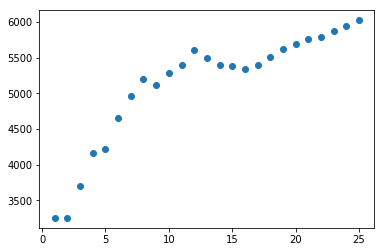

In [90]:
ks = range(1,26)
plot_best_2 = []
for k in range(1,26):
    rmse = knn_train_test_k_multiple(best_2,'price',cars_copy,k)
    plot_best_2.append(rmse)
    
plt.scatter(x=ks,y=plot_best_2)

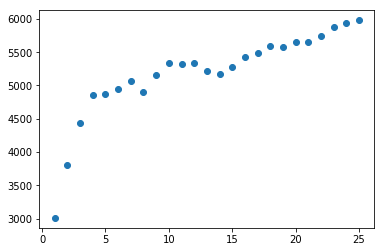

In [91]:
ks = range(1,26)
plot_best_3 = []
for k in range(1,26):
    rmse = knn_train_test_k_multiple(best_3,'price',cars_copy,k)
    plot_best_3.append(rmse)
    
plt.scatter(x=ks,y=plot_best_3)

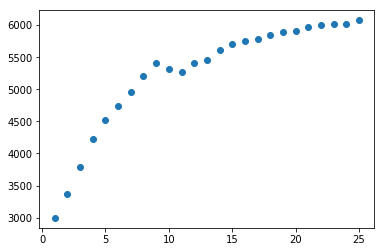

In [92]:
ks = range(1,26)
plot_best_5 = []
for k in range(1,26):
    rmse = knn_train_test_k_multiple(best_5,'price',cars_copy,k)
    plot_best_5.append(rmse)
    
plt.scatter(x=ks,y=plot_best_5)

k = 1 was found to be the best k for all models